<a href="https://colab.research.google.com/github/fsalamancar/Horizontal_UKB/blob/main/physical_measures/physical_measures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
physical_measures_df = pd.read_csv('Copia de Physical_measures_data.tsv', sep='\t', low_memory=False)

In [ ]:
physical_measures_chars_df = pd.read_csv('Copia-de-Physical_measures_chars.csv', sep=',')

In [ ]:
physical_measures_df.head()

,eid,f_21_0_0,f_21_1_0,f_21_2_0,f_21_3_0,f_36_0_0,f_36_1_0,f_36_2_0,f_36_3_0,f_37_0_0,...,f_23128_3_0,f_23129_0_0,f_23129_1_0,f_23129_2_0,f_23129_3_0,f_23130_0_0,f_23130_1_0,f_23130_2_0,f_23130_3_0,f_39_0_0
0,1000012,1.0,NaN,NaN,NaN,3782.0,NaN,NaN,NaN,NaN,...,NaN,18.7,NaN,NaN,NaN,17.9,NaN,NaN,NaN,002872
1,1000021,1.0,NaN,NaN,NaN,3780.0,NaN,NaN,NaN,NaN,...,NaN,37.9,NaN,NaN,NaN,36.5,NaN,NaN,NaN,002872
2,1000035,1.0,NaN,NaN,NaN,163.0,NaN,NaN,NaN,NaN,...,NaN,22.5,NaN,NaN,NaN,21.5,NaN,NaN,NaN,002882
3,1000044,1.0,3.0,NaN,NaN,3780.0,1046.0,NaN,NaN,NaN,...,NaN,44.0,NaN,NaN,NaN,42.3,NaN,NaN,NaN,002898
4,1000053,1.0,NaN,NaN,NaN,1058.0,NaN,NaN,NaN,NaN,...,NaN,25.3,NaN,NaN,NaN,24.2,NaN,NaN,NaN,002889


In [ ]:
physical_measures_chars_df.head()

,Field,FieldID,ValueType,Coding,Category,Participants,Items,Stability,Units,ItemType,Strata,Sexed,Instances,Array,Notes,Link,Path
0,Weight method,21,Categorical single,100261.0,100010,500718,595701,Complete,NaN,Data,Primary,Unisex,4,1,Indicates whether weight was entered into the ...,http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=21,Assessment centre > Physical measures > Anthro...
1,Blood pressure device ID,36,Text,NaN,100011,498814,585914,Complete,NaN,Data,Auxiliary,Unisex,4,1,Blood pressure (Omron) gadget ID,http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=36,Assessment centre > Physical measures > Blood ...
2,Blood pressure manual sphygmomanometer device ID,37,Text,NaN,100011,498814,585914,Complete,NaN,Data,Auxiliary,Unisex,4,1,Blood pressure manual sphygmomanometer gadget ID,http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=37,Assessment centre > Physical measures > Blood ...
3,Height measure device ID,39,Text,NaN,100010,498057,591956,Complete,NaN,Data,Auxiliary,Unisex,4,1,Height measure gadget id,http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=39,Assessment centre > Physical measures > Anthro...
4,Manual scales device ID,40,Text,NaN,100010,498057,591956,Complete,NaN,Data,Auxiliary,Unisex,4,1,Manual scales gadget id,http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=40,Assessment centre > Physical measures > Anthro...


In [ ]:
# Se crea diccionario con los nombres de las columnas
column_dic = {}
for column in physical_measures_df.columns.drop('eid'):
    try:
        field_id = column.split('_')[1]
        match = physical_measures_chars_df.loc[physical_measures_chars_df['FieldID'].astype(str) == field_id,'Field']
        if not match.empty:
            column_dic[column] = f"{match.iloc[0]}_{column.split('_')[2]}_{column.split('_')[3]}"
    except IndexError:
        print(f"¡Formato inesperado en columna {column} Se omitirá.")

# Se renombra las columnas con el diccionario anterior
physical_measures_df.rename(columns=column_dic, inplace=True)

In [ ]:
physical_measures_df.shape

(502180, 249)

Eliminando NaN

In [ ]:
columnas_a_verificar = physical_measures_df.columns.difference(['eid'])
physical_measures_df = physical_measures_df.dropna(how='all', subset=columnas_a_verificar)

In [ ]:
physical_measures_df.shape

(501365, 249)

Columnas duplicadas

In [ ]:
duplicadas = physical_measures_df.columns[physical_measures_df.columns.duplicated()].to_list()
print(len(duplicadas), "columnas duplicadas encontradas")
print("Columnas duplicadas:", duplicadas)

8 columnas duplicadas encontradas
Columnas duplicadas: ['Weight_0_0', 'Weight_1_0', 'Weight_2_0', 'Weight_3_0', 'Body mass index (BMI)_0_0', 'Body mass index (BMI)_1_0', 'Body mass index (BMI)_2_0', 'Body mass index (BMI)_3_0']


In [ ]:
# Crear una copia para trabajar
df_limpio = physical_measures_df.copy()

for col in duplicadas:
    # Encuentra todas las columnas con ese nombre
    cols_duplicadas = physical_measures_df.loc[:, physical_measures_df.columns == col]

    # Verifica si todas las columnas son iguales (comparando con la primera)
    iguales = (cols_duplicadas.eq(cols_duplicadas.iloc[:, 0], axis=0)).all().all()

    if iguales:
        # Si son iguales, quedamos solo con la primera columna
        # Eliminamos todas y luego agregamos solo una
        df_limpio = df_limpio.loc[:, ~df_limpio.columns.duplicated(keep='first')]
    else:
        print(f"Las columnas con nombre '{col}' tienen valores diferentes.")

Las columnas con nombre 'Weight_0_0' tienen valores diferentes.
Las columnas con nombre 'Weight_1_0' tienen valores diferentes.
Las columnas con nombre 'Weight_2_0' tienen valores diferentes.
Las columnas con nombre 'Weight_3_0' tienen valores diferentes.
Las columnas con nombre 'Body mass index (BMI)_0_0' tienen valores diferentes.
Las columnas con nombre 'Body mass index (BMI)_1_0' tienen valores diferentes.
Las columnas con nombre 'Body mass index (BMI)_2_0' tienen valores diferentes.
Las columnas con nombre 'Body mass index (BMI)_3_0' tienen valores diferentes.


In [ ]:
duplicadas2 = ['Weight_0_0']
for col in duplicadas:
    print(f"\n🔎 Comparando columnas con nombre: '{col}'")

    cols_duplicadas = physical_measures_df.loc[:, physical_measures_df.columns == col]
    #print(cols_duplicadas)

    # Verificar si todas son iguales por fila
    iguales_por_fila = cols_duplicadas.eq(cols_duplicadas.iloc[:, 0], axis=0).all(axis=1)

    # Mostrar solo filas donde no son iguales
    diferentes = cols_duplicadas[~iguales_por_fila]




🔎 Comparando columnas con nombre: 'Weight_0_0'

🔎 Comparando columnas con nombre: 'Weight_1_0'

🔎 Comparando columnas con nombre: 'Weight_2_0'

🔎 Comparando columnas con nombre: 'Weight_3_0'

🔎 Comparando columnas con nombre: 'Body mass index (BMI)_0_0'

🔎 Comparando columnas con nombre: 'Body mass index (BMI)_1_0'

🔎 Comparando columnas con nombre: 'Body mass index (BMI)_2_0'

🔎 Comparando columnas con nombre: 'Body mass index (BMI)_3_0'


In [ ]:
contador_iguales = 0
contador_diferentes = 0

for col in duplicadas2:
    print(f"\n🔎 Analizando columnas llamadas: '{col}'")

    # Selecciona todas las columnas con ese nombre
    cols_duplicadas = physical_measures_df.loc[:, physical_measures_df.columns == col]

    # Compara cada fila entre columnas
    filas_iguales = cols_duplicadas.eq(cols_duplicadas.iloc[:, 0], axis=0).all(axis=1)

    # Cuenta
    num_iguales = filas_iguales.sum()
    num_diferentes = len(filas_iguales) - num_iguales

    print(f"✅ Filas iguales: {num_iguales}")
    print(f"❌ Filas diferentes: {num_diferentes}")


🔎 Analizando columnas llamadas: 'Weight_0_0'
✅ Filas iguales: 492059
❌ Filas diferentes: 9306


Cambio de tipo de dato

In [ ]:
# variables de tipo text segun archivo chars
col_text = ['Blood pressure device ID','Blood pressure manual sphygmomanometer device ID','Height measure device ID',
            'Manual scales device ID','Seating box device ID','Impedance device ID','Tape measure device ID']

# variablles de tipo categorico según archivo chars
col_categories = ['Weight method', 'Seating box height', 'Method of measuring blood pressure',
                  'Reason for skipping weight', 'Reason for skipping hip measurement','Reason for skipping standing height',
                  'Reason for skipping sitting height']
# Se recorren todas las columnas
for col in physical_measures_df.columns:
  # Se obtiene el nombre de la columna sin el sufijo
  col_name = col.split('_')[0]
  # Se verifica si el nombre de la columna está en la lista de texto o categorías
  # y se cambia el tipo de dato correspondiente
  if col_name in col_text:
    physical_measures_df[col] = physical_measures_df[col].astype('string')
  if col_name in col_categories:
    physical_measures_df[col] = physical_measures_df[col].astype("Int32").astype('category')

Cortes

In [ ]:
lista_columnas = physical_measures_df.columns.to_list()
cero = 0
uno = 0
dos = 0
lenght = len(lista_columnas)
print(f"Total de columnas: {lenght}")
for col in lista_columnas:

    if col.endswith('_0'):
        cero += 1
    elif col.endswith('_1'):
        uno += 1
    elif col.endswith('_2'):
        dos += 1
    elif col.endswith('_3'):
        tres += 1
    elif col.endswith('_4'):
        cuatro += 1
print(f"Columnas terminadas en 0: {cero}")
print(f"Columnas terminadas en 1: {uno}")
print(f"Columnas terminadas en 2: {dos}")

Total de columnas: 249
Columnas terminadas en 0: 222
Columnas terminadas en 1: 26
Columnas terminadas en 2: 0


Creación dataframe con corte 0

In [ ]:
cols_0 =['eid']
# Recorremos las columnas del dataframe buscando las que terminan en '_0'
for col in physical_measures_df.columns:
    if col.endswith('_0'):
        # Si la columna termina en '_0', la agregamos a la lista
        if col not in cols_0:
            cols_0.append(col)

physical_measures_df_0 = physical_measures_df[cols_0]

Creación dataframe con corte 1

In [ ]:
cols_1 =['eid']
# Recorremos las columnas del dataframe buscando las que terminan en '_0'
for col in physical_measures_df.columns:
    if col.endswith('_1'):
        # Si la columna termina en '_0', la agregamos a la lista
        if col not in cols_1:
            cols_1.append(col)

physical_measures_df_1 = physical_measures_df[cols_1]

Dimensiones del dataset inicial

In [ ]:
print(f"Filas: {physical_measures_df.shape[0]}, Columnas: {physical_measures_df.shape[1]}")

Filas: 501365, Columnas: 249


Dimensiones del dataset con corte 0

In [ ]:
print(f"Filas: {physical_measures_df_0.shape[0]}, Columnas: {physical_measures_df_0.shape[1]}")

Filas: 501365, Columnas: 223


Dimensiones del dataset con corte 1

In [ ]:
print(f"Filas: {physical_measures_df_1.shape[0]}, Columnas: {physical_measures_df_1.shape[1]}")

Filas: 501365, Columnas: 27


Tipos de datos y valores nulos

In [ ]:
# dataframe con las columnas que terminan en '_0'
info_0 = pd.DataFrame({
    'Tipo': physical_measures_df_0.dtypes,
    'Valores_Nulos': physical_measures_df_0.isnull().sum(),
    'Porcentaje_Nulos': (physical_measures_df_0.isnull().sum() / len(physical_measures_df_0)) * 100,
    'Valores_Unicos': physical_measures_df_0.nunique()
})
print(info_0.sort_values(by='Porcentaje_Nulos', ascending=False).head(5))

                                                              Tipo  \
Reason for skipping hip measurement_0_0                   category   
Reason for skipping standing height_0_0                   category   
Reason for skipping sitting height_0_0                    category   
Blood pressure manual sphygmomanometer device I...  string[python]   
Reason for skipping weight_0_0                            category   

                                                    Valores_Nulos  \
Reason for skipping hip measurement_0_0                    500861   
Reason for skipping standing height_0_0                    500542   
Reason for skipping sitting height_0_0                     500522   
Blood pressure manual sphygmomanometer device I...         500511   
Reason for skipping weight_0_0                             500321   

                                                    Porcentaje_Nulos  \
Reason for skipping hip measurement_0_0                    99.899474   
Reason for skipping 

In [ ]:
# dataframe con las columnas que terminan en '_1'

info_1 = pd.DataFrame({
    'Tipo': physical_measures_df_1.dtypes,
    'Valores_Nulos': physical_measures_df_1.isnull().sum(),
    'Porcentaje_Nulos': (physical_measures_df_1.isnull().sum() / len(physical_measures_df_1)) * 100,
    'Valores_Unicos': physical_measures_df_1.nunique()
})
print(info_1.sort_values(by='Porcentaje_Nulos', ascending=False).head(5))

                                                        Tipo  Valores_Nulos  \
Systolic blood pressure, automated reading_3_1       float64         495708   
Pulse rate, automated reading_3_1                    float64         495706   
Diastolic blood pressure, automated reading_3_1      float64         495706   
Method of measuring blood pressure_3_1              category         495350   
Time since interview start at which blood press...   float64         495350   

                                                    Porcentaje_Nulos  \
Systolic blood pressure, automated reading_3_1             98.871680   
Pulse rate, automated reading_3_1                          98.871281   
Diastolic blood pressure, automated reading_3_1            98.871281   
Method of measuring blood pressure_3_1                     98.800275   
Time since interview start at which blood press...         98.800275   

                                                    Valores_Unicos  
Systolic blood pressure

In [ ]:
resultado = info_0[info_0['Porcentaje_Nulos'] > 90].sort_values(by='Porcentaje_Nulos', ascending=False)


print( resultado.index.tolist())
print("Porcetajes mayores a 90 %: ",len( resultado.index.tolist()))


['Reason for skipping hip measurement_0_0', 'Reason for skipping standing height_0_0', 'Reason for skipping sitting height_0_0', 'Blood pressure manual sphygmomanometer device ID_2_0', 'Reason for skipping weight_0_0', 'Weight, manual entry_2_0', 'Manual scales device ID_3_0', 'Trunk predicted mass_3_0', 'Whole body fat mass_3_0', 'Arm fat mass (right)_3_0', 'Whole body fat-free mass_3_0', 'Body fat percentage_3_0', 'Impedance of arm (left)_3_0', 'Impedance of arm (right)_3_0', 'Weight_3_0', 'Body mass index (BMI)_3_0', 'Impedance of whole body_3_0', 'Whole body water mass_3_0', 'Leg fat-free mass (right)_3_0', 'Leg predicted mass (right)_3_0', 'Leg fat mass (right)_3_0', 'Leg fat percentage (right)_3_0', 'Impedance of leg (right)_3_0', 'Impedance of leg (left)_3_0', 'Leg predicted mass (left)_3_0', 'Leg fat percentage (left)_3_0', 'Arm fat-free mass (right)_3_0', 'Arm predicted mass (right)_3_0', 'Arm fat percentage (right)_3_0', 'Leg fat mass (left)_3_0', 'Arm fat-free mass (left)_3_

Separando columnas de tipo texto

In [ ]:
# dataframe con las columnas que terminan en '_0' y que son de tipo texto
# Se seleccionan las columnas de tipo texto
text_cols_df = physical_measures_df_0.select_dtypes(include=['string'])
text_cols_list = text_cols_df.columns.tolist()

Separando columnas categorías

In [ ]:
# dataframe con las columnas que terminan en '_0' y que son de tipo categorico
# Se seleccionan las columnas de tipo categorico
cat_cols_df = physical_measures_df_0.select_dtypes(include=['category'])
cat_cols_list = cat_cols_df.columns.tolist()
cat_cols_list

['Weight method_0_0',
 'Weight method_1_0',
 'Weight method_2_0',
 'Weight method_3_0',
 'Seating box height_0_0',
 'Seating box height_1_0',
 'Seating box height_2_0',
 'Seating box height_3_0',
 'Method of measuring blood pressure_0_0',
 'Method of measuring blood pressure_1_0',
 'Method of measuring blood pressure_2_0',
 'Method of measuring blood pressure_3_0',
 'Reason for skipping weight_0_0',
 'Reason for skipping hip measurement_0_0',
 'Reason for skipping standing height_0_0',
 'Reason for skipping sitting height_0_0']

Separando columnas de tipo numérico

In [ ]:
# dataframe con las columnas que terminan en '_0' y que son de tipo numerico
# Se seleccionan las columnas de tipo numerico
num_cols_df = physical_measures_df_0.select_dtypes(include=[np.number])
num_cols_list = num_cols_df.columns.tolist()
num_cols_list

['eid',
 'Waist circumference_0_0',
 'Waist circumference_1_0',
 'Waist circumference_2_0',
 'Waist circumference_3_0',
 'Hip circumference_0_0',
 'Hip circumference_1_0',
 'Hip circumference_2_0',
 'Hip circumference_3_0',
 'Standing height_0_0',
 'Standing height_1_0',
 'Standing height_2_0',
 'Standing height_3_0',
 'Seated height_0_0',
 'Seated height_1_0',
 'Seated height_2_0',
 'Seated height_3_0',
 'Systolic blood pressure, manual reading_0_0',
 'Systolic blood pressure, manual reading_2_0',
 'Diastolic blood pressure, manual reading_0_0',
 'Diastolic blood pressure, manual reading_2_0',
 'Pulse rate (during blood-pressure measurement)_0_0',
 'Pulse rate (during blood-pressure measurement)_2_0',
 'Time since interview start at which blood pressure screen(s) shown_0_0',
 'Time since interview start at which blood pressure screen(s) shown_1_0',
 'Time since interview start at which blood pressure screen(s) shown_2_0',
 'Time since interview start at which blood pressure screen(s) 

In [ ]:
print(f"\nNuméricas: {len(num_cols_list)}, Categóricas: {len(cat_cols_list)}, Text: {len(text_cols_list)}")


Numéricas: 181, Categóricas: 16, Text: 26


In [ ]:
import gc
del physical_measures_df
gc.collect()

5005

In [ ]:
print("\nEstadísticas descriptivas numéricas:")
physical_measures_df_0[num_cols_list].describe().T


Estadísticas descriptivas numéricas:


,count,mean,std,min,25%,50%,75%,max
eid,501365.0,3.511242e+06,1.449926e+06,1000012.0,2255542.0,3511188.0,4766992.0,6022444.0
Waist circumference_0_0,500019.0,9.031247e+01,1.348591e+01,20.0,80.0,90.0,99.0,197.0
Waist circumference_1_0,20315.0,9.056380e+01,1.323249e+01,26.0,81.0,90.0,99.0,164.0
Waist circumference_2_0,75880.0,8.953147e+01,1.297030e+01,20.0,80.0,89.0,98.0,184.0
Waist circumference_3_0,7227.0,8.953985e+01,1.257925e+01,53.0,80.0,89.0,98.0,153.0
...,...,...,...,...,...,...,...,...
Trunk fat-free mass_3_0,5168.0,2.936498e+01,5.906303e+00,16.0,24.2,28.4,34.2,53.4
Trunk predicted mass_0_0,491597.0,2.836920e+01,5.805036e+00,2.0,23.5,27.0,33.1,56.5
Trunk predicted mass_1_0,20037.0,2.822716e+01,5.707873e+00,13.7,23.2,27.3,33.0,50.6
Trunk predicted mass_2_0,55647.0,2.826929e+01,5.728285e+00,2.0,23.2,27.4,33.0,50.9


Cambiando valores de categorías según archivo keys

In [ ]:
physical_measures_keys_df = pd.read_csv('Copia de Physical_measures_cbkeys.tsv', sep='\t')

In [ ]:
z = physical_measures_keys_df.loc[physical_measures_keys_df['coding_name']==100259,['code','meaning']]
g = z.loc[z['code']==2,'meaning']
print(g.iloc[0]) # "No se realizó la medición"

Manual entry of electronic results


In [ ]:
def modificar(coding_name, code):

    code_df= physical_measures_keys_df.loc[physical_measures_keys_df['coding_name']==coding_name,['code','meaning']]
    if code_df.empty:
        print(f"No se encontró el coding_name {coding_name}.")
        return None
    meaning = code_df.loc[code_df['code']==code,'meaning']
    if meaning.empty:
        print(f"No se encontró el código {code} para el coding_name {coding_name}.")
        return None
    return meaning.iloc[0]

In [ ]:
cat_cols_df["Weight method_0_0"]
for cat in cat_cols_list:
    cat_field = cat.split('_')[0]
    match = physical_measures_chars_df.loc[physical_measures_chars_df['Field'].astype(str) == cat_field,'Coding'].astype("int32")
    #physical_measures_df_0
    coding_name = match.tolist()[0]
    #print(cat,coding_name)
    physical_measures_df_0[cat] = physical_measures_df_0[cat].apply(lambda x: modificar(coding_name, x) if pd.notnull(x) else x)

physical_measures_df_0['Weight method_2_0'].unique()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22920\944058901.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physical_measures_df_0[cat] = physical_measures_df_0[cat].apply(lambda x: modificar(coding_name, x) if pd.notnull(x) else x)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22920\944058901.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physical_measures_df_0[cat] = physical_measures_df_0[cat].apply(lambda x: modificar(coding_name, x) if pd.notnull(x) else x)
C:\Users\lenovo\AppData\Local\Temp\i

[NaN, 'Direct entry', 'Manual measurement of weight only', 'Manual entry of full results', 'Not performed']
Categories (4, object): ['Direct entry', 'Manual entry of full results', 'Manual measurement of weight only', 'Not performed']

Proporción valores en cada categoría

In [ ]:
print("\ncategorías:")
for col in cat_cols_list[:10]:
    print(f"\nColumna {col}:")
    print(physical_measures_df_0[col].value_counts(normalize=True))


categorías:

Columna Weight method_0_0:
Weight method_0_0
Direct entry                                  0.983220
Manual measurement of weight only             0.014628
Not performed                                 0.002086
Manual entry of full results                  0.000050
Question not asked due to previous answers    0.000016
Name: proportion, dtype: float64

Columna Weight method_1_0:
Weight method_1_0
Direct entry                         0.985733
Manual measurement of weight only    0.012692
Not performed                        0.001525
Manual entry of full results         0.000049
Name: proportion, dtype: float64

Columna Weight method_2_0:
Weight method_2_0
Direct entry                         0.960773
Manual measurement of weight only    0.027171
Manual entry of full results         0.009566
Not performed                        0.002490
Name: proportion, dtype: float64

Columna Weight method_3_0:
Weight method_3_0
Direct entry                         0.979250
Manual measurem

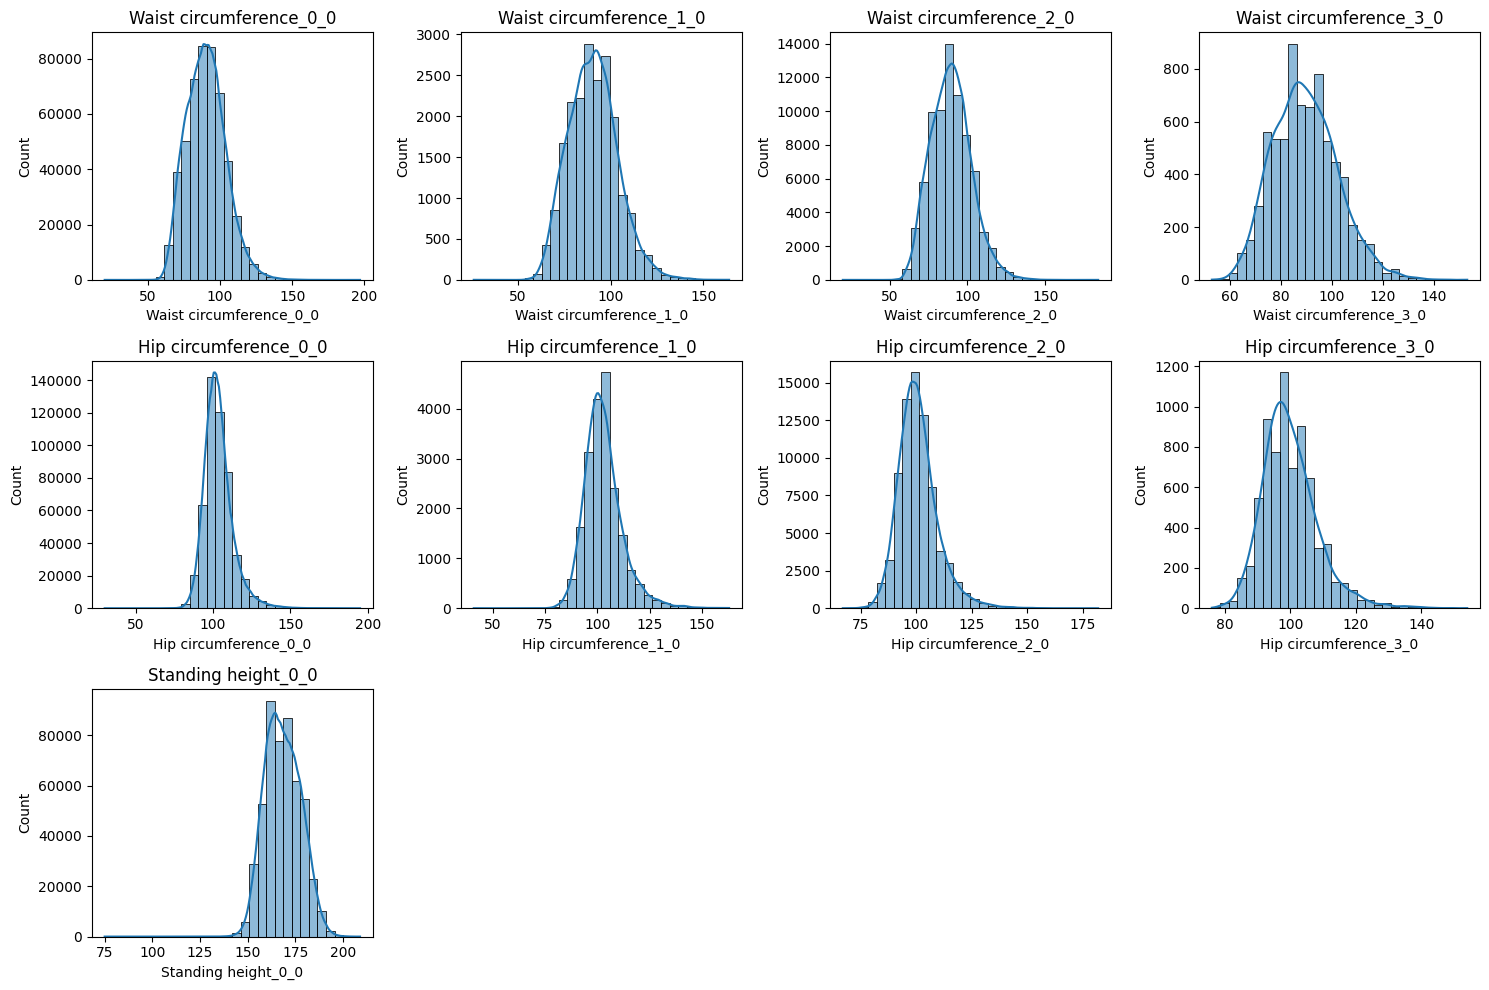

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols_list[1:10]):
    plt.subplot(3, 4, i+1)
    sns.histplot(physical_measures_df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

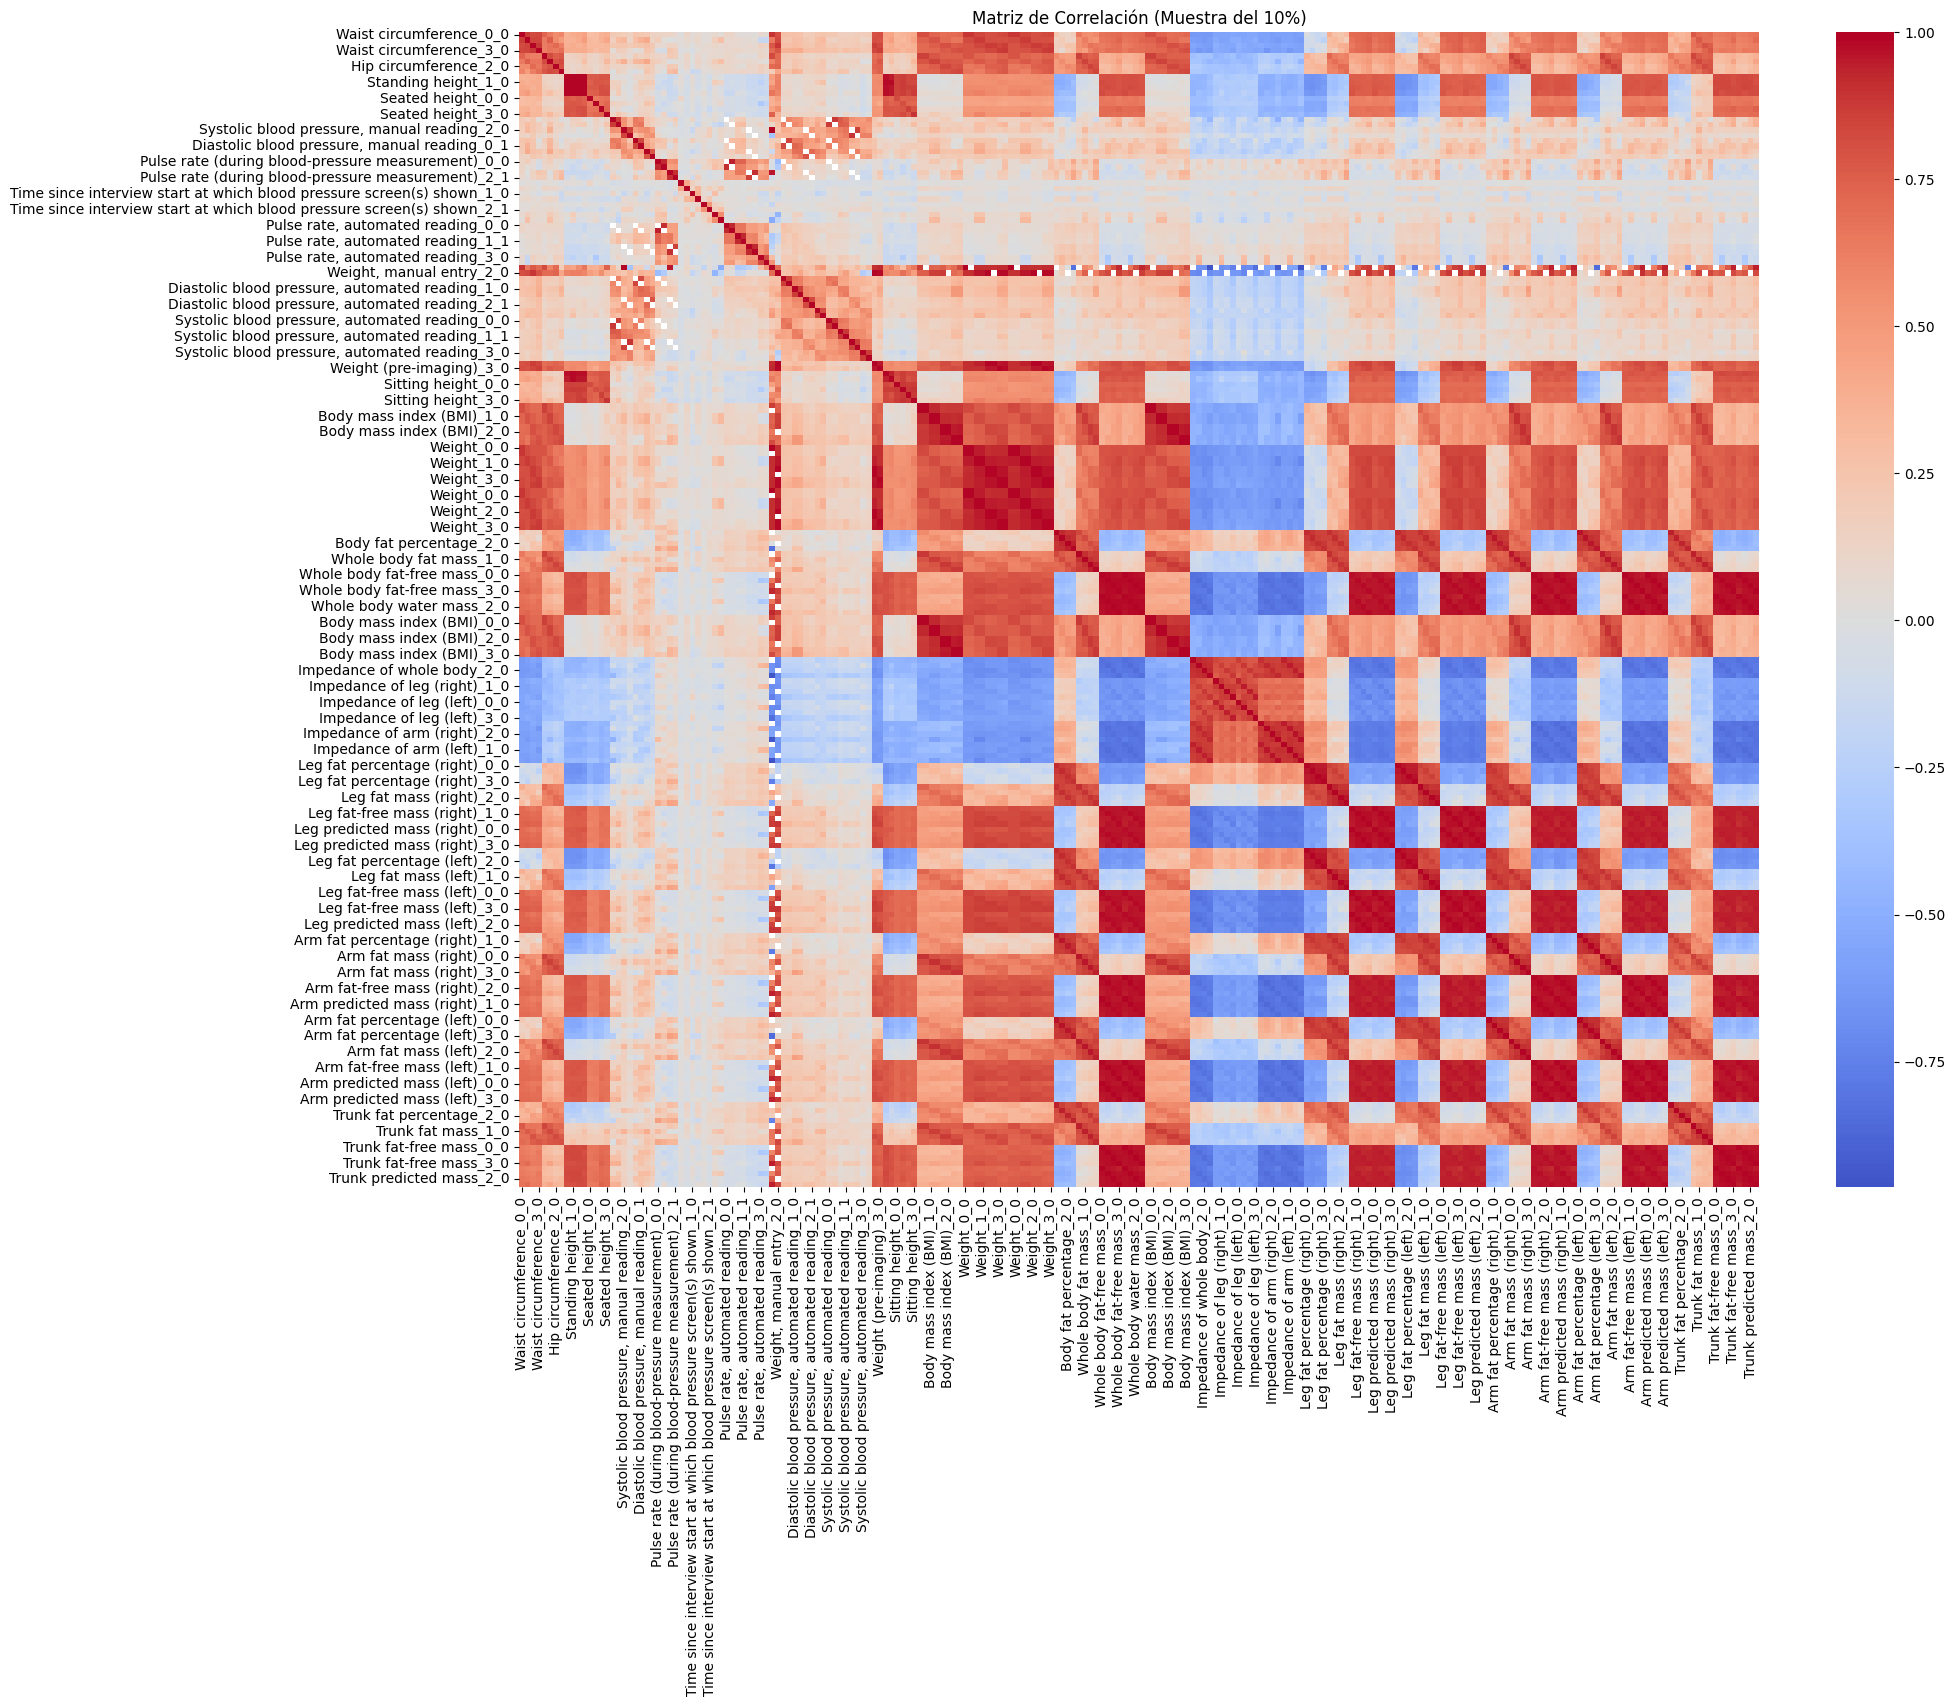

In [ ]:

sample_df = physical_measures_df[num_cols_list].sample(frac=0.1)
corr_matrix = sample_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación (Muestra del 10%)')
plt.show()

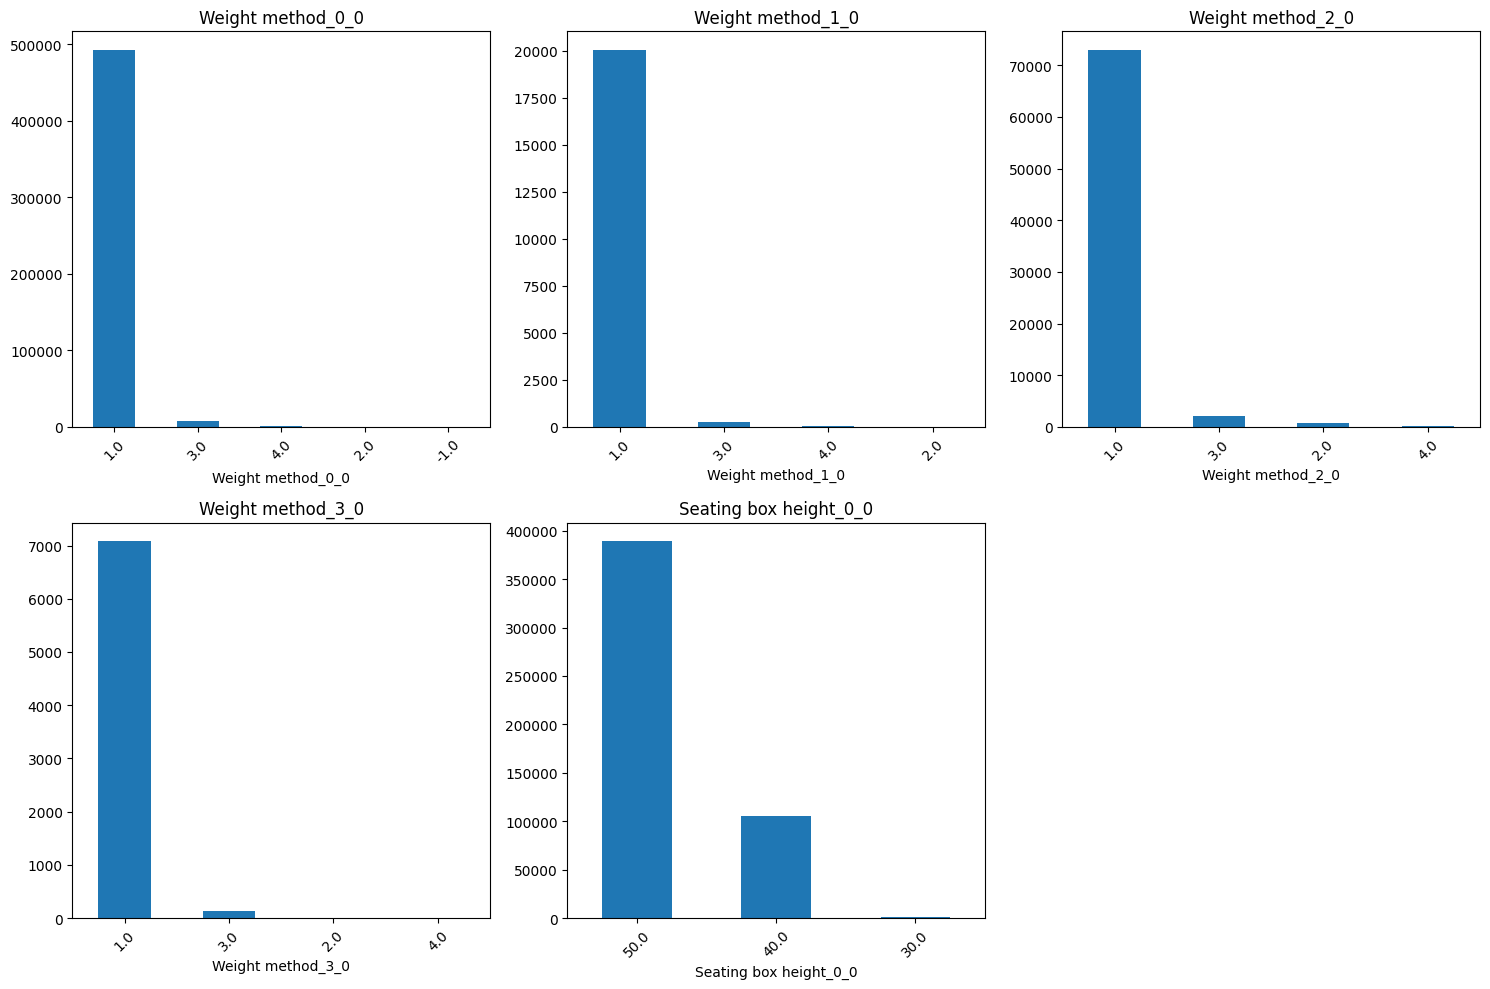

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols_list[:5]):
    plt.subplot(2, 3, i+1)
    physical_measures_df[col].value_counts().head(10).plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

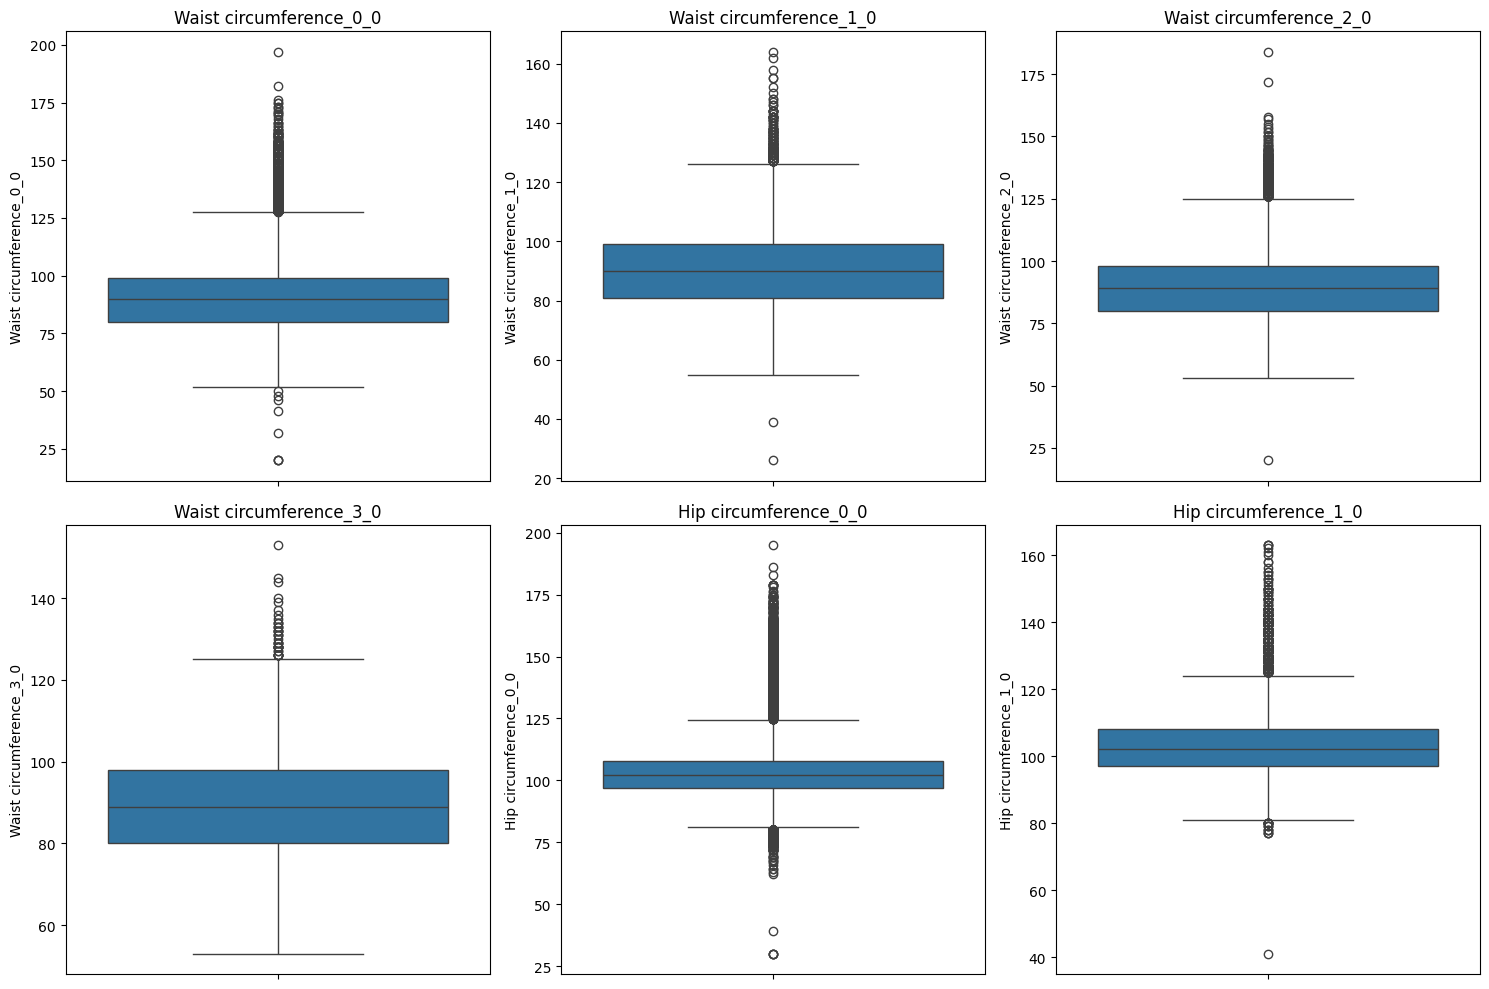

In [ ]:
# Detección de outliers con boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols_list[1:7]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=physical_measures_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()